![datiaperti logo](images/datiaperti_small.png)

# Natural hazards in the Marche region 
On September 15th 2022, several municipalities in the Marche region of Italy have been hit by a flood that took the lives of 13 people and brought destruction in many villages. In this notebook we perform an analysis of the exposure of the Marche region to floods and landslides as assessed in field campaigns all over Italy. It is also assumed that an area that has been affected by landslides in the past is more exposed to a risk of new landslides and potential damages in case a flood event occurs. We use the standard definition of risk R

$$R = \sum_i P_i*E_i*V_i$$

where $P_i$ is the probability of the occurrence of a natural hazard, $E_i$ the exposure of a population or assets within the area to that specific hazard, and $V_i$ the vulnerability of the population or assets. We will look with particular care what was the exposure of the municipalities that have been hit by the last flood in September 15th 2022 to landslides. We will use four datasets, two from [ISTAT](https://www.istat.it/it/archivio/222527) for the borders of the municipalities of the Marche region and the resident population, and two from [ISPRA](https://idrogeo.isprambiente.it/app/page/open-data) for the geometries of landslides and flood events that were detected in those municipalities. 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("geopandas version: %s"%gpd.__version__)

numpy version: 1.25.2
geopandas version: 0.14.0


## Landslides
We will begin with the landslides. We open the dataset of the administrative borders of the municipalities of the Marche region. 

### Data Analysis

In [4]:
path_municipalities_marche = 'data/vector/italy/istat_confini_comuni/marche/marche.shp'
comuni_marche_gdf = gpd.read_file(path_municipalities_marche)
comuni_marche_gdf.head(2)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
0,3,11,44,0,44,44073,044073,Venarotta,NaN,0,3.020961e+07,35147.593496,"POLYGON ((866075.377 4763076.292, 866110.876 4..."
1,3,11,44,0,44,44065,044065,Rotella,NaN,0,2.743726e+07,30282.443322,"POLYGON ((870717.596 4769636.484, 870729.346 4..."


We drop the columns that will not be used

In [5]:
comuni_marche_gdf.drop(columns=['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM', 'PRO_COM_T', 'COMUNE_A', 'CC_UTS', 'Shape_Leng'], inplace=True)
comuni_marche_gdf.head(2)

,COMUNE,Shape_Area,geometry
0,Venarotta,3.020961e+07,"POLYGON ((866075.377 4763076.292, 866110.876 4..."
1,Rotella,2.743726e+07,"POLYGON ((870717.596 4769636.484, 870729.346 4..."


In [6]:
comuni_marche_gdf.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
num_municipalities_marche = len(comuni_marche_gdf)
print('Number of municipalities in the Marche region: {0:d}'.format(num_municipalities_marche))

Number of municipalities in the Marche region: 225


We change the unit of the shape area from $m^2$ to $km^2$

In [8]:
for i in range(0, num_municipalities_marche):
    comuni_marche_gdf['Shape_Area'].iloc[i] = comuni_marche_gdf['Shape_Area'].iloc[i] / 1000000

In [9]:
comuni_marche_gdf.head(2)

,COMUNE,Shape_Area,geometry
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4..."
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4..."


(749704.6458300003, 908702.3213699996, 4728429.965085, 4882348.7634149995)

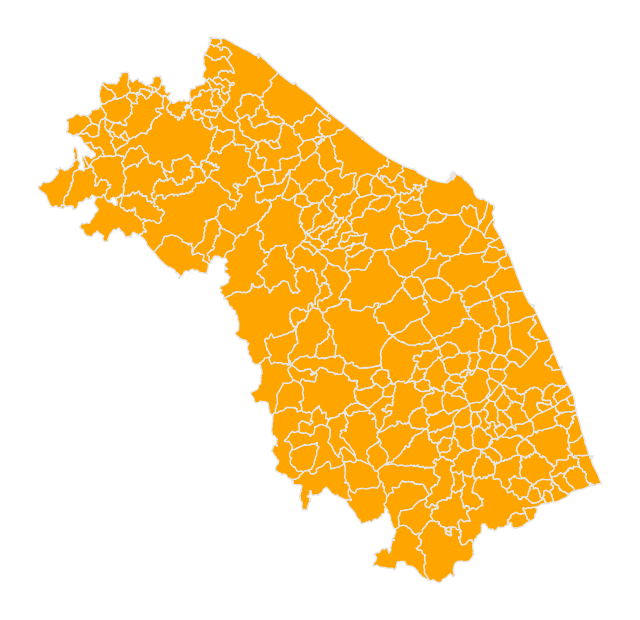

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 8))
comuni_marche_gdf.plot(color='orange', ax=ax, edgecolor='0.9')
ax.axis('off')

Then we open the dataset of the landslides that have been catalogued in the Marche region

In [11]:
path_landslides_marche = 'data/vector/italy/landslides/marche/frane_poly_opendataPolygon.shp'
marche_landslides_gdf = gpd.read_file(path_landslides_marche)
marche_landslides_gdf.head(2)

,id_frana,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr,geometry
0,0410208900,2,Scivolamento rotazionale/traslativo,11.0,Marche,41.0,Pesaro e Urbino,41015.0,Fossombrone,4,Appennino Centrale,"POLYGON ((801238.516 4844001.870, 801233.311 4..."
1,0430168600,2,Scivolamento rotazionale/traslativo,11.0,Marche,43.0,Macerata,43053.0,Tolentino,4,Appennino Centrale,"POLYGON ((851976.165 4789561.121, 851975.493 4..."


The dataset of the landslides uses the same CRS of the municipalities, projected Transverse Mercator.

In [12]:
marche_landslides_gdf.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We use the border of the Marche region to better visualize the area 

In [13]:
confini_marche_gdf = gpd.read_file('data/vector/italy/istat_confini_regioni/confini_marche/confini_marche.shp')
len(confini_marche_gdf)

1

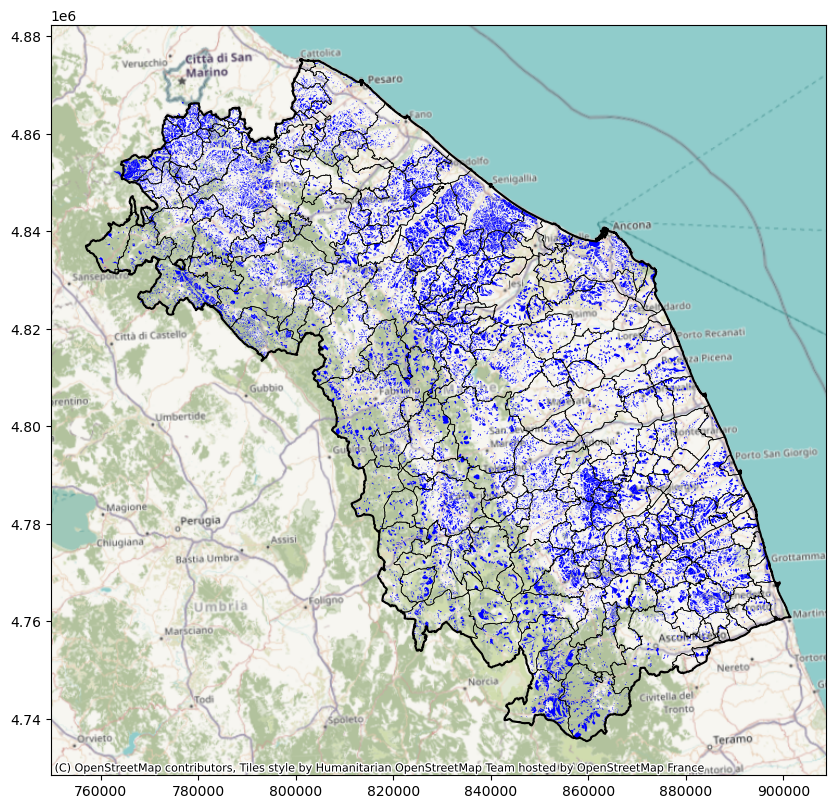

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 10))
marche_landslides_gdf.plot(facecolor='blue', ax=ax)
confini_marche_gdf.plot(ax=ax, color='None', linewidth=1.5, edgecolor='black')
comuni_marche_gdf.plot(color='none', ax=ax, edgecolor='black', linewidth=0.5)
cx.add_basemap(ax, crs=marche_landslides_gdf.crs)
#plt.savefig('images/marche_landslides.jpg')

We count the number of landslides in each municipality and compute some statistics

In [15]:
landslides_per_mun = marche_landslides_gdf.groupby('nome_com').count()
num_landslides = landslides_per_mun['id_frana']
num_landslides.head()

nome_com
Acqualagna          417
Acquasanta Terme    365
Acquaviva Picena     19
Agugliano            67
Altidona             21
Name: id_frana, dtype: int64

In [16]:
tot_num_landslides_marche = sum(num_landslides)
print('Total number of landslides in the Marche region: {0:d}'.format(tot_num_landslides_marche))

Total number of landslides in the Marche region: 31988


In [17]:
num_municipalities_at_risk_marche = len(num_landslides)
print('Number of municipalities at risk of landslides in the Marche region: {0:d}'.format(num_municipalities_at_risk_marche))

Number of municipalities at risk of landslides in the Marche region: 225


In [18]:
ratio = (num_municipalities_at_risk_marche / num_municipalities_marche) * 100
print('Percentage of municipalities at risk of landslides in the Marche region: {0:.1f} %'.format(ratio))

Percentage of municipalities at risk of landslides in the Marche region: 100.0 %


In [19]:
municip_max_num_landslides = num_landslides.idxmax()
max_num_landslides = num_landslides[municip_max_num_landslides]
print('Municipality with max number of landslides: {0:s}. Total landslides: {1:d}'.format(municip_max_num_landslides, max_num_landslides))

Municipality with max number of landslides: Urbino. Total landslides: 1348


### Attribute Join: merging the two datasets
Now we want to add the information about the risk of landslides to the datasets that contains the geometry of the municipalities in the Marche region. We have 225 municipalities and all of them have at least one landslide in its territory. A technique to achieve our goal is to do a merge of the two datasets by [attribute join](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#attribute-joins). After the merge we expect to have a new column, e.g. 'NUM_LANDSLIDES', added to marche_landslides_gdf. The total number of rows will stay the same, 225, with the additional infomation about the number of landslides. 

We need a dataframe of the municipalities with the number of landslides.   

In [20]:
municipalities_at_risk_marche_df = pd.DataFrame({ 'COMUNE': num_landslides.keys(), 'NUM_LANDSLIDES': num_landslides.values})
municipalities_at_risk_marche_df.head()

,COMUNE,NUM_LANDSLIDES
0,Acqualagna,417
1,Acquasanta Terme,365
2,Acquaviva Picena,19
3,Agugliano,67
4,Altidona,21


We can sort the municipalities by the number of landslides 

In [21]:
municipalities_at_risk_marche_df.sort_values(by='NUM_LANDSLIDES', ascending=False).head()

,COMUNE,NUM_LANDSLIDES
218,Urbino,1348
199,Senigallia,1317
21,Cagli,863
196,Sassocorvaro Auditore,707
56,Fabriano,604


We merge the dataset of the municipalities with the data of the number of landslides by their common field 'COMUNE' in order to add the information about the number of landslides to the first dataset.

In [22]:
merged_df = comuni_marche_gdf.merge(municipalities_at_risk_marche_df, left_on=['COMUNE'], right_on=['COMUNE'])
merged_df.head(3)

,COMUNE,Shape_Area,geometry,NUM_LANDSLIDES
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4...",18
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4...",45
2,Offida,49.602492,"POLYGON ((884481.734 4768764.977, 884511.233 4...",336


In [23]:
len(merged_df)

225

### Landslides data visualization
We can now use the merged dataset to plot a choropleth map of the municipalities and the number of landslides on each of them.

In [24]:
import folium

marche_landslides_map = folium.Map(location=[43.5, 13], zoom_start=8)

folium.Choropleth(
    geo_data=merged_df,
    name="choropleth",
    data=merged_df,
    columns=['COMUNE', 'NUM_LANDSLIDES'],
    key_on="feature.properties.COMUNE",
    fill_color='OrRd', #"YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Num. Landslides",
).add_to(marche_landslides_map)

In [25]:
import branca.colormap as cm
#colormap = cm.linear.YlGnBu_09.to_step(data=merged_df['NUM_LANDSLIDES'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])
colormap = cm.linear.OrRd_09.to_step(data=merged_df['NUM_LANDSLIDES'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])

style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['NUM_LANDSLIDES']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

json = folium.features.GeoJson(
    merged_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COMUNE','NUM_LANDSLIDES'],
        aliases=['Municipality: ','Num. Landslides: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
marche_landslides_map.add_child(json)
marche_landslides_map.keep_in_front(json)
folium.LayerControl().add_to(marche_landslides_map)
#marche_landslides_map

## Floods
We perform the same process for the floods. We use the data from IdroGEO: [Mosaicatura nazionale 2020 pericolosità alluvioni](https://idrogeo.isprambiente.it/opendata/wms/Mosaicatura_ISPRA_2020_aree_pericolosita_idraulica.zip). The data cover the entire italian territory and is divided into three sets, depending on the level of probability, or frequency: high (return time between 20 and 50 years), medium (return time between 100 and 200 years) or low (return time more than 200 years) . For Marche there is no high risk data so we used only the medium risk data. The first step is to filter out all the polygons that are outside of the Marche region. We will perform this task using the **within** operator between the floods dataset and the dataset with border of the Marche region.

We load the dataset of the areas at risk of flood

In [26]:
path_flood = 'data/vector/italy/floods/marche/Mosaicatura_ISPRA_2020_aree_pericolosita_idraulica/MPH_Mosaicatura_ISPRA_2020_pericolosita_idraulica_media.shp'
#path_flood = 'data/vector/italy/floods/marche/mosaicatura_ispra_hydro_hazard/mosaicatura_ispra_hydro_hazard.shp'
medium_flood_italy_gdf = gpd.read_file(path_flood)
medium_flood_italy_gdf.head(2)

,scenario,geometry
0,Pericolosita' idraulica media - MediumProbabil...,"POLYGON ((4550992.663 1623370.293, 4550965.308..."
1,Pericolosita' idraulica media - MediumProbabil...,"POLYGON ((4542366.627 1650160.978, 4542383.310..."


In [27]:
medium_flood_italy_gdf.rename(columns={'scenario':'Flood Risk'}, inplace=True)

In [28]:
flood_risk_tmp = medium_flood_italy_gdf['Flood Risk']
medium_flood_italy_gdf['Flood Risk'] = flood_risk_tmp.apply(lambda value: 1)
medium_flood_italy_gdf.head(2)

,Flood Risk,geometry
0,1,"POLYGON ((4550992.663 1623370.293, 4550965.308..."
1,1,"POLYGON ((4542366.627 1650160.978, 4542383.310..."


In [29]:
num_flood_areas = len(medium_flood_italy_gdf)
num_flood_areas

29493

In [30]:
medium_flood_italy_gdf.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

### Data analysis
The dataset of the floods does not contain the information about the municipalities in which the areas at risk of flood are located so we use the topological operators to assign each area to a municipality and compute the number of flooded areas for each municipality.

### The Coordinate Reference Systems
We can see that the coordinate reference system (CRS) of the flooded areas and that of the municipalities is different. They are both projected reference systems but they use different datums and projections. The CRS of the muncipalities uses the WGS84 datum and the Transverse Mercator projection, its EPSG code is [EPSG:32632](https://epsg.io/32632). The CRS of the areas at risk of flood uses the European datum ETRS89 and the Lambert Azimuthal Equal Area projection. The EPSG code for this CRS is [EPSG:3035](https://epsg.io/3035). Before using the topological operators we have to change the CRS of the flooded areas from EPSG:3035 to EPSG:32632. The coordinates of the polygons of the flooded areas will be transformed automatically.

### Changing the Coordinate Reference System
We change the coordinate reference system of the flooded areas from EPSG:3035 to EPSG:32632

In [31]:
medium_flood_italy_gdf_epsg32632 = medium_flood_italy_gdf.copy()
medium_flood_italy_gdf_epsg32632.to_crs(epsg=32632, inplace=True)
medium_flood_italy_gdf_epsg32632.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
medium_flood_italy_gdf_epsg32632.head()

,Flood Risk,geometry
0,1,"POLYGON ((816476.192 4173280.111, 816449.779 4..."
1,1,"POLYGON ((807674.627 4200250.348, 807691.313 4..."
2,1,"POLYGON ((810203.964 4208515.556, 810266.895 4..."
3,1,"POLYGON ((812030.591 4214361.886, 812019.495 4..."
4,1,"POLYGON ((811810.404 4215280.789, 811849.523 4..."


## Flooded areas in the Marche region
Now that the CRS of the flooded areas is the same as the CRS of the municipalities and the coordinates have been transformed accordingly we can find which flooded area lies within the Marche region. We will also create a new dataset of floods in the Marche region.

In [33]:
medium_flood_marche_mask = medium_flood_italy_gdf_epsg32632.within(confini_marche_gdf.loc[0, 'geometry'])
medium_flood_marche_mask.any() == True

True

In [34]:
flooded_areas_marche_tmp = medium_flood_italy_gdf_epsg32632[medium_flood_marche_mask]

In [35]:
num_flooded_areas_marche = len(flooded_areas_marche_tmp)
print('There are {0:d} flooded areas within the Marche region'.format(num_flooded_areas_marche))

There are 150 flooded areas within the Marche region


We create a new GeoDataFrame to change the index

In [36]:
flood_risk = flooded_areas_marche_tmp['Flood Risk'].values
geometry = flooded_areas_marche_tmp['geometry'].values
flooded_areas_marche_dict = {'Flood Risk': flood_risk, 'geometry': geometry}
flooded_areas_marche = gpd.GeoDataFrame(flooded_areas_marche_dict, crs="EPSG:32632", index=range(0, num_flooded_areas_marche))
flooded_areas_marche.head(2)

,Flood Risk,geometry
0,1,"POLYGON ((797521.466 4816551.929, 797521.429 4..."
1,1,"POLYGON ((796210.326 4817581.558, 796232.627 4..."


(749704.6458300003, 908702.3213699996, 4728429.965085, 4882348.7634149995)

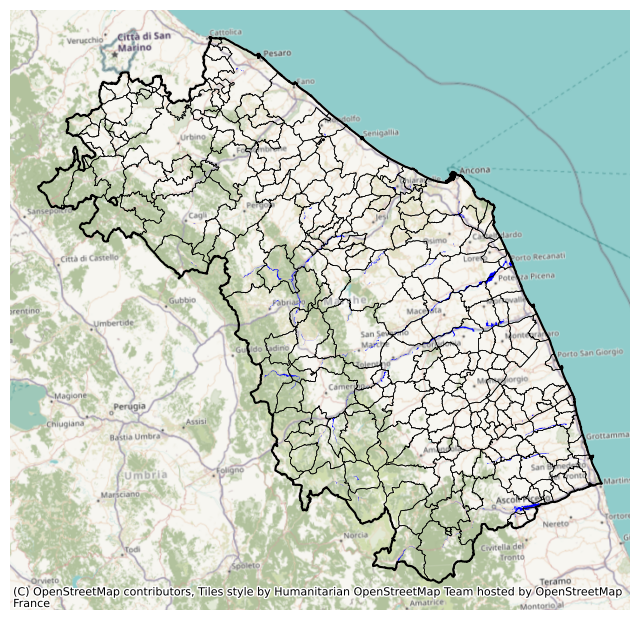

In [37]:
fig, ax = plt.subplots(1, figsize=(8, 8))
flooded_areas_marche.plot(color='blue', ax=ax)
confini_marche_gdf.plot(ax=ax, color='none', linewidth=1.5, edgecolor='black')
comuni_marche_gdf.plot(color='none', ax=ax, edgecolor='black', linewidth=0.5)
cx.add_basemap(ax, crs=marche_landslides_gdf.crs)
plt.savefig('images/marche_floods.jpg')
ax.axis('off')

We save the data for later use. 

In [38]:
flooded_areas_marche.to_file('data/vector/italy/floods/marche/mosaicatura_ispra_hydro_hazard_marche')

## Merging geometries: spatial joins
We use a spatial join to merge the records of two datasets whose geomtries have a topological relation, in our case this relation is **intersects**.

In [39]:
municipalities_with_flood_risk_df = flooded_areas_marche.sjoin(comuni_marche_gdf, how='inner', predicate='intersects')
flood_risk_df = municipalities_with_flood_risk_df.drop(columns=['geometry', 'Shape_Area', 'index_right'])

In [40]:
flood_risk_df

,Flood Risk,COMUNE
0,1,Cantiano
1,1,Cantiano
2,1,Cantiano
3,1,Cantiano
4,1,Cantiano
...,...,...
146,1,Montefelcino
146,1,Colli al Metauro
147,1,Mondolfo
148,1,Fano


In [41]:
num_flood_risk_df_tmp = flood_risk_df[flood_risk_df['Flood Risk'] == 1].groupby(by=['COMUNE']).sum()
len(num_flood_risk_df_tmp)

89

We print the first 10 municipalities by number of areas at flood risk

In [42]:
num_flood_risk_df = pd.DataFrame({'COMUNE': num_flood_risk_df_tmp.index.values.tolist(), 'NUM_AREAS_FLOOD_RISK': num_flood_risk_df_tmp['Flood Risk'].values})
num_flood_risk_df

,COMUNE,NUM_AREAS_FLOOD_RISK
0,Acquasanta Terme,7
1,Acquaviva Picena,1
2,Ancona,2
3,Arquata del Tronto,7
4,Ascoli Piceno,39
...,...,...
84,Treia,1
85,Ussita,2
86,Valfornace,2
87,Venarotta,1


In [43]:
num_flood_risk_df.sort_values(by = 'NUM_AREAS_FLOOD_RISK', ascending = False).head(10)

,COMUNE,NUM_AREAS_FLOOD_RISK
4,Ascoli Piceno,39
27,Fabriano,11
0,Acquasanta Terme,7
3,Arquata del Tronto,7
75,San Severino Marche,6
49,Montecosaro,6
9,Camerino,5
10,Cantiano,5
15,Castelraimondo,5
62,Pesaro,4


In [44]:
merged_marche_municip_flood_risk_df = comuni_marche_gdf.merge(num_flood_risk_df, left_on=['COMUNE'], right_on=['COMUNE'])
merged_marche_municip_flood_risk_df.sort_values(by = 'NUM_AREAS_FLOOD_RISK', ascending = False).head()

,COMUNE,Shape_Area,geometry,NUM_AREAS_FLOOD_RISK
72,Ascoli Piceno,158.020309,"MULTIPOLYGON (((873618.065 4762973.785, 873607...",39
51,Fabriano,272.077634,"POLYGON ((824964.007 4816320.651, 825012.756 4...",11
68,Arquata del Tronto,92.182064,"POLYGON ((851010.736 4750018.413, 851068.486 4...",7
23,Acquasanta Terme,138.391358,"POLYGON ((858480.427 4751241.896, 858531.676 4...",7
17,Montecosaro,21.877937,"POLYGON ((875122.350 4809161.661, 875166.850 4...",6


In [45]:
merged_marche_municip_flood_risk_df.shape

(89, 4)

In [46]:
marche_floods_map = folium.Map(location=[43.5, 13], zoom_start=8)

folium.Choropleth(
    geo_data=merged_marche_municip_flood_risk_df,
    name="choropleth",
    data=merged_marche_municip_flood_risk_df,
    columns=['COMUNE', 'NUM_AREAS_FLOOD_RISK'],
    key_on="feature.properties.COMUNE",
    fill_color='OrRd', #"YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Flood Risk",
).add_to(marche_floods_map)

In [47]:
import branca.colormap as cm
#colormap = cm.linear.YlGnBu_09.to_step(data=merged_df['NUM_LANDSLIDES'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])
colormap = cm.linear.OrRd_09.to_step(data=merged_marche_municip_flood_risk_df['NUM_AREAS_FLOOD_RISK'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])

style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['NUM_AREAS_FLOOD_RISK']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

json = folium.features.GeoJson(
    merged_marche_municip_flood_risk_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COMUNE', 'NUM_AREAS_FLOOD_RISK'],
        aliases=['Municipality: ','Num. Areas Flood Risk: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

marche_floods_map.add_child(json)
marche_floods_map.keep_in_front(json)
folium.LayerControl().add_to(marche_floods_map)
#marche_floods_map

## Integrating data from satellite imagery: the Copernicus Emergency Management Service
We want to add to the historical data the new data acquired after the more recent flood event in several areas of the Marche region: Cantiano, Sassoferrato, Arcevia, Barbara, Ostra, Senigallia, Trecastelli, Mondolfo, . The data is provided by the Copernicus Emergency Management Service.

In [48]:
path_copernicus_emsr634_cantiano = 'data/vector/italy/floods/marche/EMSR634_AOI01_Cantiano/EMSR634_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shp'
emsr634_cantiano_gdf = gpd.read_file(path_copernicus_emsr634_cantiano)
emsr634_cantiano_gdf.head(2)

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,5-Flood,Riverine flood,Photo-interpretation,Flooded area,2,0.684583,"POLYGON ((12.63350 43.44378, 12.63349 43.44367..."
1,5-Flood,Riverine flood,Photo-interpretation,Flooded area,2,0.282146,"POLYGON ((12.62752 43.47000, 12.62752 43.46993..."


In [49]:
emsr634_cantiano_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
len(emsr634_cantiano_gdf)

58

## Statistical datasets
In order to estimate the risks we need information about the impacts on the population and assets. We filter the data about the resident population and houses from the ISTAT [web service](http://dati.istat.it/Index.aspx) and save it as a CSV file. These datasets contains the values for each municipality and also the aggregated values for the regions that we have to remove.

### Population at risk 
We merge the population dataset with the dataset about the risk of floods and with the dataset about the number of landslides in each municipality. The result dataset can be used to compute the risks for the two natural hazards: floods and landslides. There can be different way of computing the risk from the data about the population, the flood risk and the number of landslides for each municipality. The data used doesn't allow us to go beyond a very rough estimation of the risks but it can help to drive our attention to the places with the highest number of people that have a large number of landslides, or are at flood risk or both. 

In [51]:
italy_population_data_path = 'data/statistics/italy/istat_popolazione_residente_totale_2022.csv'
italy_population_df_tmp = pd.read_csv(italy_population_data_path, usecols=['Territorio', 'SEXISTAT1', 'CITTADINANZA', 'Value'])
italy_population_all_tmp_df = italy_population_df_tmp[italy_population_df_tmp['SEXISTAT1'] == 'T'] 
italy_population_all_citizenship_df = italy_population_all_tmp_df[italy_population_all_tmp_df['CITTADINANZA'] == 'TOTAL']
italy_population_all_citizenship_df.rename(columns={'Value': 'Population'}, inplace=True)
italy_population_tmp_df = italy_population_all_citizenship_df.drop(columns=['SEXISTAT1', 'CITTADINANZA'])
italy_population_tmp_df[italy_population_tmp_df['Territorio'] == 'Venarotta']

,Territorio,Population
46216,Venarotta,1894


In [52]:
comuni_marche_population_gdf = comuni_marche_gdf.merge(italy_population_tmp_df, left_on=['COMUNE'], right_on=['Territorio'])
comuni_marche_population_gdf.drop(columns=['Territorio'], inplace=True)
comuni_marche_population_gdf.head()

,COMUNE,Shape_Area,geometry,Population
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4...",1894
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4...",803
2,Offida,49.602492,"POLYGON ((884481.734 4768764.977, 884511.233 4...",4657
3,San Benedetto del Tronto,25.405333,"POLYGON ((898229.622 4768169.217, 898243.122 4...",47075
4,Belmonte Piceno,10.531917,"POLYGON ((872239.597 4782752.376, 872255.346 4...",573


In [53]:
comuni_marche_population_gdf.shape

(230, 4)

In [54]:
marche_population_map = folium.Map(location=[43.5, 13], zoom_start=8)

folium.Choropleth(
    geo_data=comuni_marche_population_gdf,
    name="choropleth",
    data=comuni_marche_population_gdf,
    columns=['COMUNE', 'Population'],
    key_on="feature.properties.COMUNE",
    fill_color='OrRd', #"YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population",
).add_to(marche_population_map)

In [55]:
#colormap = cm.linear.YlGnBu_09.to_step(data=merged_df['NUM_LANDSLIDES'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])
colormap = cm.linear.OrRd_09.to_step(data=comuni_marche_population_gdf['Population'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])

style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['Population']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

json = folium.features.GeoJson(
    comuni_marche_population_gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COMUNE', 'Population'],
        aliases=['Municipality: ','Population: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

marche_population_map.add_child(json)
marche_population_map.keep_in_front(json)
folium.LayerControl().add_to(marche_population_map)
#marche_population_map

## Ranking municipalities by risk
Since we do not have a time series of natural hazard events we cannot estimate the probability of future events, still we can sort the municipalities by their exposure to them. We add the information about the number of flood events and the number of landslided to the dataset of the population in order to compute the ranking of the municipalities by the exposure to risk. We compute the risk for each municipality using the formula

$$Risk = log(\frac{Floods + Landslides}{Area} * Population)$$

This is of course a very rough estimation, its only purpose is to show how to compute a ranking

In [56]:
comuni_marche_population_flood_gdf = comuni_marche_population_gdf.merge(num_flood_risk_df, left_on=['COMUNE'], right_on=['COMUNE'])
comuni_marche_population_flood_gdf.head(2)

,COMUNE,Shape_Area,geometry,Population,NUM_AREAS_FLOOD_RISK
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4...",1894,1
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4...",803,1


In [57]:
comuni_marche_population_flood_landslides_gdf = comuni_marche_population_flood_gdf.merge(municipalities_at_risk_marche_df, left_on=['COMUNE'], right_on=['COMUNE'])
comuni_marche_population_flood_landslides_gdf.head(2)

,COMUNE,Shape_Area,geometry,Population,NUM_AREAS_FLOOD_RISK,NUM_LANDSLIDES
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4...",1894,1,18
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4...",803,1,45


In [58]:
area = comuni_marche_population_flood_landslides_gdf['Shape_Area']
population = comuni_marche_population_flood_landslides_gdf['Population']
floods = comuni_marche_population_flood_landslides_gdf['NUM_AREAS_FLOOD_RISK']
landslides = comuni_marche_population_flood_landslides_gdf['NUM_LANDSLIDES']
risk = round(np.log10((landslides + floods) * population / area))
comuni_marche_population_flood_landslides_gdf['Risk'] = risk
comuni_marche_population_flood_landslides_gdf.head(2)

,COMUNE,Shape_Area,geometry,Population,NUM_AREAS_FLOOD_RISK,NUM_LANDSLIDES,Risk
0,Venarotta,30.209606,"POLYGON ((866075.377 4763076.292, 866110.876 4...",1894,1,18,3.0
1,Rotella,27.437262,"POLYGON ((870717.596 4769636.484, 870729.346 4...",803,1,45,3.0


We print the 1st 10 municipalities ranked by the risk computed using the above formula  

In [59]:
comuni_marche_population_flood_landslides_gdf.sort_values(by = 'Risk', inplace=True, ascending=False)
comuni_marche_population_flood_landslides_gdf.head(10)

,COMUNE,Shape_Area,geometry,Population,NUM_AREAS_FLOOD_RISK,NUM_LANDSLIDES,Risk
51,Pesaro,152.811616,"POLYGON ((804654.966 4875019.204, 804669.466 4...",95620,4,532,6.0
22,Ancona,124.868269,"POLYGON ((863667.222 4840656.922, 863716.722 4...",98950,2,533,6.0
21,Ancona,124.868269,"POLYGON ((863667.222 4840656.922, 863716.722 4...",461655,2,533,6.0
74,Ascoli Piceno,158.020309,"MULTIPOLYGON (((873618.065 4762973.785, 873607...",45664,39,164,5.0
14,Macerata,92.526277,"POLYGON ((856248.002 4810164.172, 856259.502 4...",303828,3,91,5.0
53,Fabriano,272.077634,"POLYGON ((824964.007 4816320.651, 825012.756 4...",28970,11,604,5.0
54,Falconara Marittima,25.814793,"POLYGON ((850430.832 4842045.813, 850445.926 4...",25579,2,40,5.0
35,Tolentino,95.118098,"POLYGON ((848212.305 4798520.273, 848323.304 4...",17933,4,454,5.0
64,Montemarciano,22.310598,"POLYGON ((850482.968 4842084.992, 850473.178 4...",9780,1,167,5.0
73,Pollenza,39.547266,"POLYGON ((855355.502 4803086.229, 855347.752 4...",6243,2,206,5.0


In [60]:
marche_risk_map = folium.Map(location=[43.5, 13], zoom_start=8)

folium.Choropleth(
    geo_data=comuni_marche_population_flood_landslides_gdf,
    name="choropleth",
    data=comuni_marche_population_flood_landslides_gdf,
    columns=['COMUNE', 'Risk'],
    key_on="feature.properties.COMUNE",
    fill_color='OrRd', #"YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Risk",
).add_to(marche_risk_map)

In [61]:
colormap = cm.linear.OrRd_09.to_step(data=comuni_marche_population_flood_landslides_gdf['Risk'], method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])

style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['Risk']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

json = folium.features.GeoJson(
    comuni_marche_population_flood_landslides_gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COMUNE', 'Risk'],
        aliases=['Municipality: ','Risk: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

marche_risk_map.add_child(json)
marche_risk_map.keep_in_front(json)
folium.LayerControl().add_to(marche_risk_map)
#marche_risk_map

### Assets at risk
The dataset about the houses contains the number of houses or apartments that are rented or owned by a household, so we will filter all the records for which 'TIT_POSSESSO' == 'ALL'

In [62]:
italy_abitazioni_data_path = 'data/statistics/italy/istat_abitazioni_italia_2024.csv'
italy_abitazioni_df_tmp = pd.read_csv(italy_abitazioni_data_path, usecols=['Territorio', 'Value', 'TIT_POSSESSO'])
italy_abitazioni_df_tmp.rename(columns={'Value': 'Abitazioni'}, inplace=True)
italy_abitazioni_all_df_tmp = italy_abitazioni_df_tmp[italy_abitazioni_df_tmp['TIT_POSSESSO'] == 'ALL']
italy_abitazioni_all_df_tmp.drop(columns=['TIT_POSSESSO'], inplace=True)
italy_abitazioni_all_df_tmp.head()

,Territorio,Abitazioni
0,Italia,25346523.0
1,Nord-ovest,7147895.0
2,Piemonte,1961002.0
3,Torino,1027144.0
4,Vercelli,76676.0


## Conclusion
We have seen how to integrate different datasets to extract some statistical information about natural hazards, floods and landslides. We have mapped these events into the administrative divisions of the Marche region using the topological relation for vector data. From the data aggragated by administrative units we have been able to make a rough estimation of the risks for floods and landslides for each of them. The territory of a municipality might be a too large area to locate hazards precisely but it is still useful to guide our attention or that of decision makers.  

## References
* [L'alluvione delle Marche nei dati da satellite, La Repubblica](https://www.repubblica.it/green-and-blue/2022/09/30/news/alluvione_marche_dati_satellite-368034583/)
* [Open Data Regione Marche](https://www.regione.marche.it/Regione-Utile/Paesaggio-Territorio-Urbanistica-Genio-Civile/Cartografia-e-informazioni-territoriali/OpenData)
* [ISPRA - Geological Survey of Italy - Natural Hazard](http://portalesgi.isprambiente.it/en/categorie-db/natural-hazard)
* [ISPRA - Rapporto sulle condizioni di pericolosità da alluvione in Italia e indicatori di rischio associati](https://www.isprambiente.gov.it/it/pubblicazioni/rapporti/rapporto-sulle-condizioni-di-pericolosita-da-alluvione-in-italia-e-indicatori-di-rischio-associati)
* [ISPRA - Dissesto idrogeologico in Italia: pericolosità e indicatori di rischio - Edizione 2021](https://www.isprambiente.gov.it/it/pubblicazioni/rapporti/dissesto-idrogeologico-in-italia-pericolosita-e-indicatori-di-rischio-edizione-2021)
* [Copernicus Emergency Management Service - EMSR634: Floods in Umbria and Marche Regions, Italy](https://emergency.copernicus.eu/mapping/list-of-components/EMSR634)